**Authors:** Joinal Ahmed | Manish KC

**Contributors:**  Julian Miranda, Gunnika Batra

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dphi-official/Exploratory-Data-Analysis/blob/master/end-to-end/wine.ipynb)

# Introduction to Exploratory Data Analysis
#### Agenda


*   **Loading Libraries**
*   **Loading Data** 
*   **Data Analysis**
*   **Data Visualization**



In this tutorial, you will learn one of the important step of a Data Science pipeline i.e. Exploratory Data Analysis.

**Exploratory Data Analysis (EDA):** In this step, we try to understand the data and the underlying interactions between different variables.

The dataset we will be using here is the wine quality data. 

**Data Set Information:**
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Quality is based on sensory scores (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use. 

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [0]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

## Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

In [0]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

Let's check how our data looks. This can be done using head() method.

In [0]:
# Red Wine
red_wine_data.head()    # we can also pass the number of records we want in the brackets (). By default it displays first 5 records.

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [0]:
# White Wine
white_wine_data.head(6)      # we will get first 6 records from white wine data

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6
5            8.1              0.28         0.40  ...       0.44     10.1        6

[6 rows x 12 columns]

Le's explore the attributes / columns of the datasets. Both red and white wines have the same columns.



In [0]:
# Columns / Attribute
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Target Variable:
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

Here **quality** is the target variable as we're trying to know which of the two types of wines have a better quality.




### Input Variables:
One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'. 

All of these will help us predict the quality of the wine.


### Variables/Features:
Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variables.

## Exploratory Data Analysis (EDA)
After loading the data, it is important to examine the data. It is usually not recommended to directly throw all the data into the model without understanding the data. This step always helps in improving our model.

Concatenate both the data.

In [0]:
# Add a column to separate whether the wine is red or white.
red_wine_data['color'] = 'r'
white_wine_data['color'] = 'w'


In [0]:
wine_data = pd.concat([red_wine_data, white_wine_data])

Let's rename the columns which contain spaces in their names.

In [0]:
# rename() function is used to rename the columns

# wine data
# red_wine_data
wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity',
                          'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},
                 inplace = True)

# red_wine_data
red_wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity',
                          'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},
                 inplace = True)    # inplace = True makes changes in the dataframe itself

# white_wine_data
white_wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity',
                          'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},
                 inplace = True)

In [0]:
red_wine_data.head(2)

fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  quality
0            7.4              0.70          0.0  ...       0.56      9.4        5
1            7.8              0.88          0.0  ...       0.68      9.8        5

[2 rows x 12 columns]

In [0]:
# concise summary about dataset
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


It is always interesting to know the basic statistical characteristics of each numerical variables.

In [0]:
# Basic Statistical details 
red_wine_data.describe()

fixed_acidity  volatile_acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [0]:
white_wine_data.describe()

fixed_acidity  volatile_acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

Let's explore different statistical measures that we have got from desribe().


*   **count:** total count of non-null values in the column
*   **mean**: the average of all the values in that column
*   **min:** the minimum value in the column
*   **max:** the maximum value in the column
*   **25%:** first quartile in the column after we arrange those values in ascending order
*   **50%:** this is the median or the second quartile
*   **75%:** the third quartile 
*   **std:** this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)

**Note:** 25%, 50%, and 75% are nothing but corresponding percentile values


Our brains are good at spotting patterns in pictures. Let's play around different types of data visualizations.

In [0]:
# first import data visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

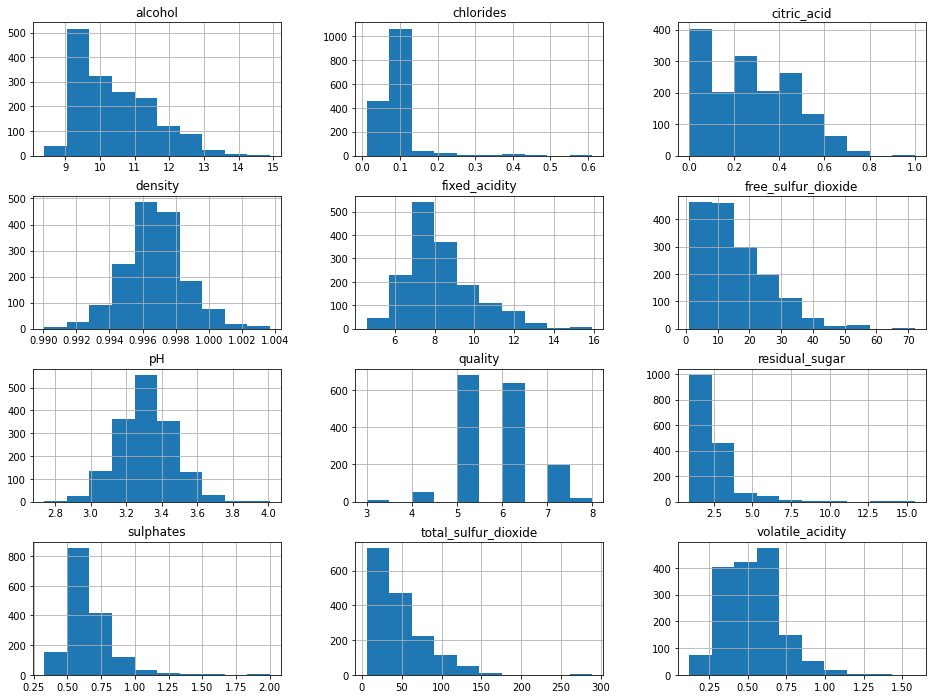

In [0]:
# red wines      
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

The distribution of the attribute seems to be positively skewed. The attributes '**density**' and '**pH**' are quite normally distributed (you must have read about normal distribution in basic statistics study material). Now looking at the attribute **quality**, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than bad and good quality of wines.

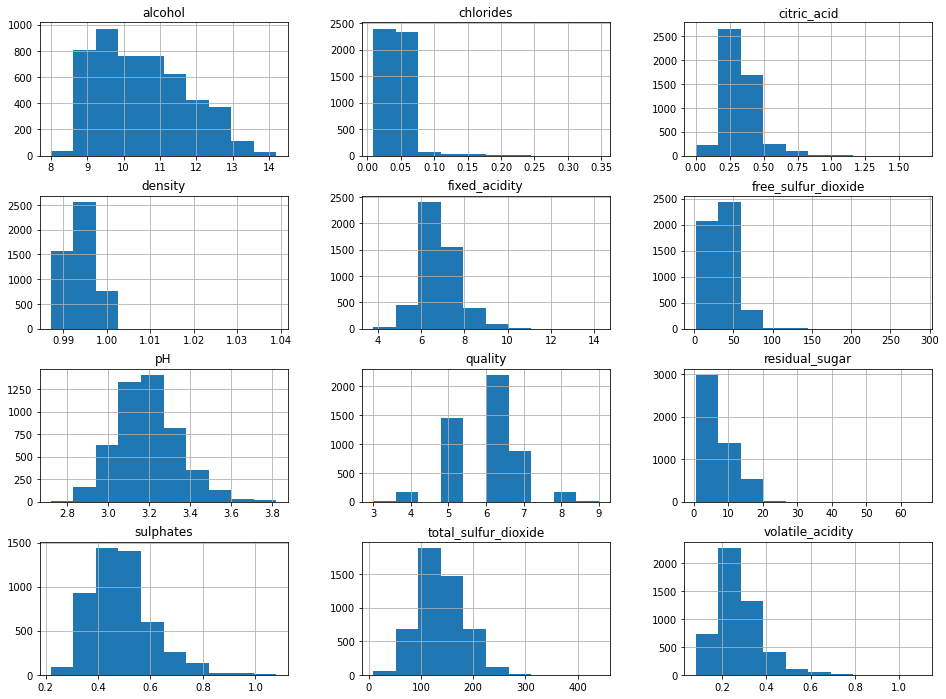

In [0]:
# white wine
white_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

For white wines, the attribute '**pH**' is quite normally distributed. The average **quality** of wines are more than good and bad qualities of wines for white wine data too. Most of the wines seem to be containing **alcohol** percentage in the range 8.5% to nearly 13%.

We can use pivot tables to observe the values of different features for each quality of wines.

In [0]:
# Creating pivot table for red wine
columns = list(red_wine_data.columns).remove('quality')
red_wine_data.pivot_table(columns, ['quality'], aggfunc=np.median)    # By default the aggfunc is mean

alcohol  chlorides  ...  total_sulfur_dioxide  volatile_acidity
quality                      ...                                        
3          9.925     0.0905  ...                  15.0             0.845
4         10.000     0.0800  ...                  26.0             0.670
5          9.700     0.0810  ...                  47.0             0.580
6         10.500     0.0780  ...                  35.0             0.490
7         11.500     0.0730  ...                  27.0             0.370
8         12.150     0.0705  ...                  21.5             0.370

[6 rows x 11 columns]

For each quality of red wines, we can observe the median values of different features.

In [0]:
# Creating pivot table for red wine
columns = list(white_wine_data.columns).remove('quality')
white_wine_data.pivot_table(columns, ['quality'], aggfunc=np.median)

alcohol  chlorides  ...  total_sulfur_dioxide  volatile_acidity
quality                      ...                                        
3          10.45      0.041  ...                 159.5              0.26
4          10.10      0.046  ...                 117.0              0.32
5           9.50      0.047  ...                 151.0              0.28
6          10.50      0.043  ...                 132.0              0.25
7          11.40      0.037  ...                 122.0              0.25
8          12.00      0.036  ...                 122.0              0.26
9          12.50      0.031  ...                 119.0              0.27

[7 rows x 11 columns]

We can check how each features are reated with others using corr() function.

The correlation value ranges between -1 to 1.When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean that there is no linear correlation. We can observe the detail information using correlation matrix

In [0]:
# red wines
red_wine_data.corr()

fixed_acidity  volatile_acidity  ...   alcohol   quality
fixed_acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile_acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric_acid                0.671703         -0.552496  ...  0.109903  0.226373
residual_sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free_sulfur_dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total_sulfur_dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.390558  ...  0.476166  1.000000

[12 rows x 12 columns]

From the above correlation matrix, we can observe that there is a relatively high positive correlation between **fixed_acidity** and **citric_acid**, **fixed_acidity** and **density**. Similarly we can observe there is a relatively high negative correlation between **fixed_acidity** and **pH**. There is relatively high positive correlation between **alcohol** presence and quality of the wines.

In [0]:
# white wines
white_wine_data.corr()

fixed_acidity  volatile_acidity  ...   alcohol   quality
fixed_acidity              1.000000         -0.022697  ... -0.120881 -0.113663
volatile_acidity          -0.022697          1.000000  ...  0.067718 -0.194723
citric_acid                0.289181         -0.149472  ... -0.075729 -0.009209
residual_sugar             0.089021          0.064286  ... -0.450631 -0.097577
chlorides                  0.023086          0.070512  ... -0.360189 -0.209934
free_sulfur_dioxide       -0.049396         -0.097012  ... -0.250104  0.008158
total_sulfur_dioxide       0.091070          0.089261  ... -0.448892 -0.174737
density                    0.265331          0.027114  ... -0.780138 -0.307123
pH                        -0.425858         -0.031915  ...  0.121432  0.099427
sulphates                 -0.017143         -0.035728  ... -0.017433  0.053678
alcohol                   -0.120881          0.067718  ...  1.000000  0.435575
quality                   -0.113663         -0.194723  ...  0.435575  1.000000

[12 rows x 12 columns]

We can plot the above correlation matrix using heatmaps too. The visualization using heatmap is a pictorial visualization.

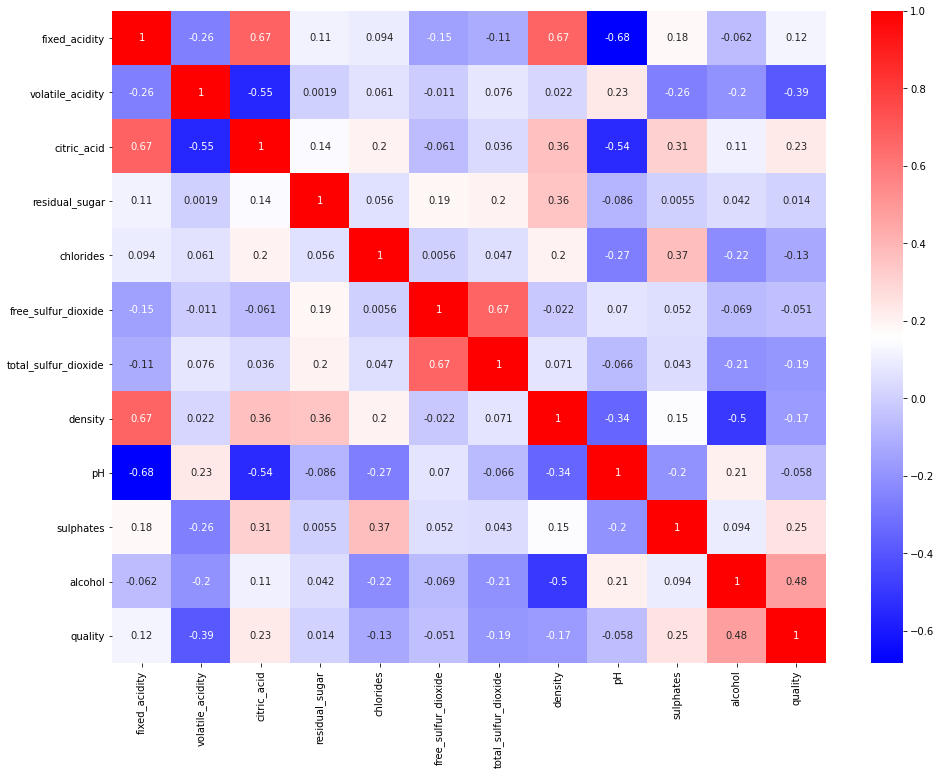

In [0]:
# red wines
plt.figure(figsize=(16, 12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

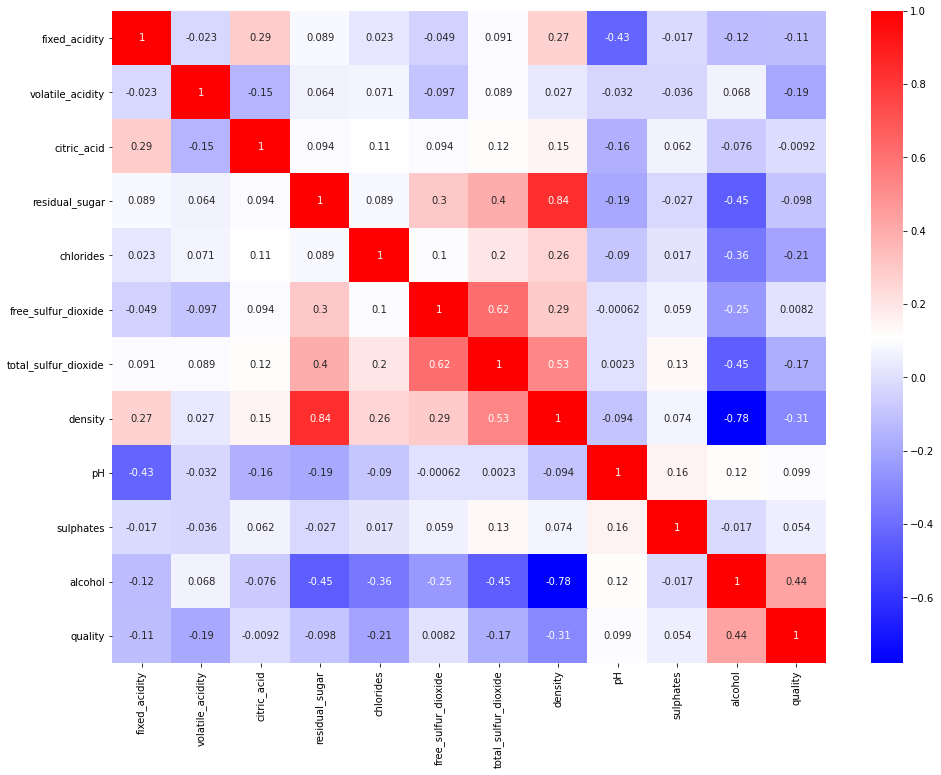

In [0]:
# white wines
plt.figure(figsize=(16, 12))
sns.heatmap(white_wine_data.corr(), cmap='bwr', annot=True)

#### Discrete Categorical Attributes
The attribute quality is categorical in nature and we can visualize this type of attributes using barplot or countplot.

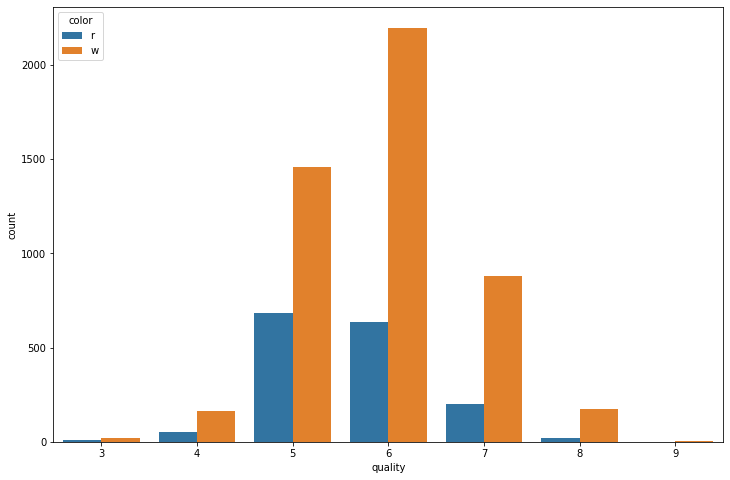

In [0]:
# Countplot for quality of wines present in different category of wines (red and white)
plt.figure(figsize=(12,8))
sns.countplot(wine_data.quality, hue=wine_data.color)

From above countplot, we can observe that the average quality of wines are more than good and bad quality of wines in both variants of wines. 

We can visualize scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other. 'pairplot' of seaborn helps to achieve this

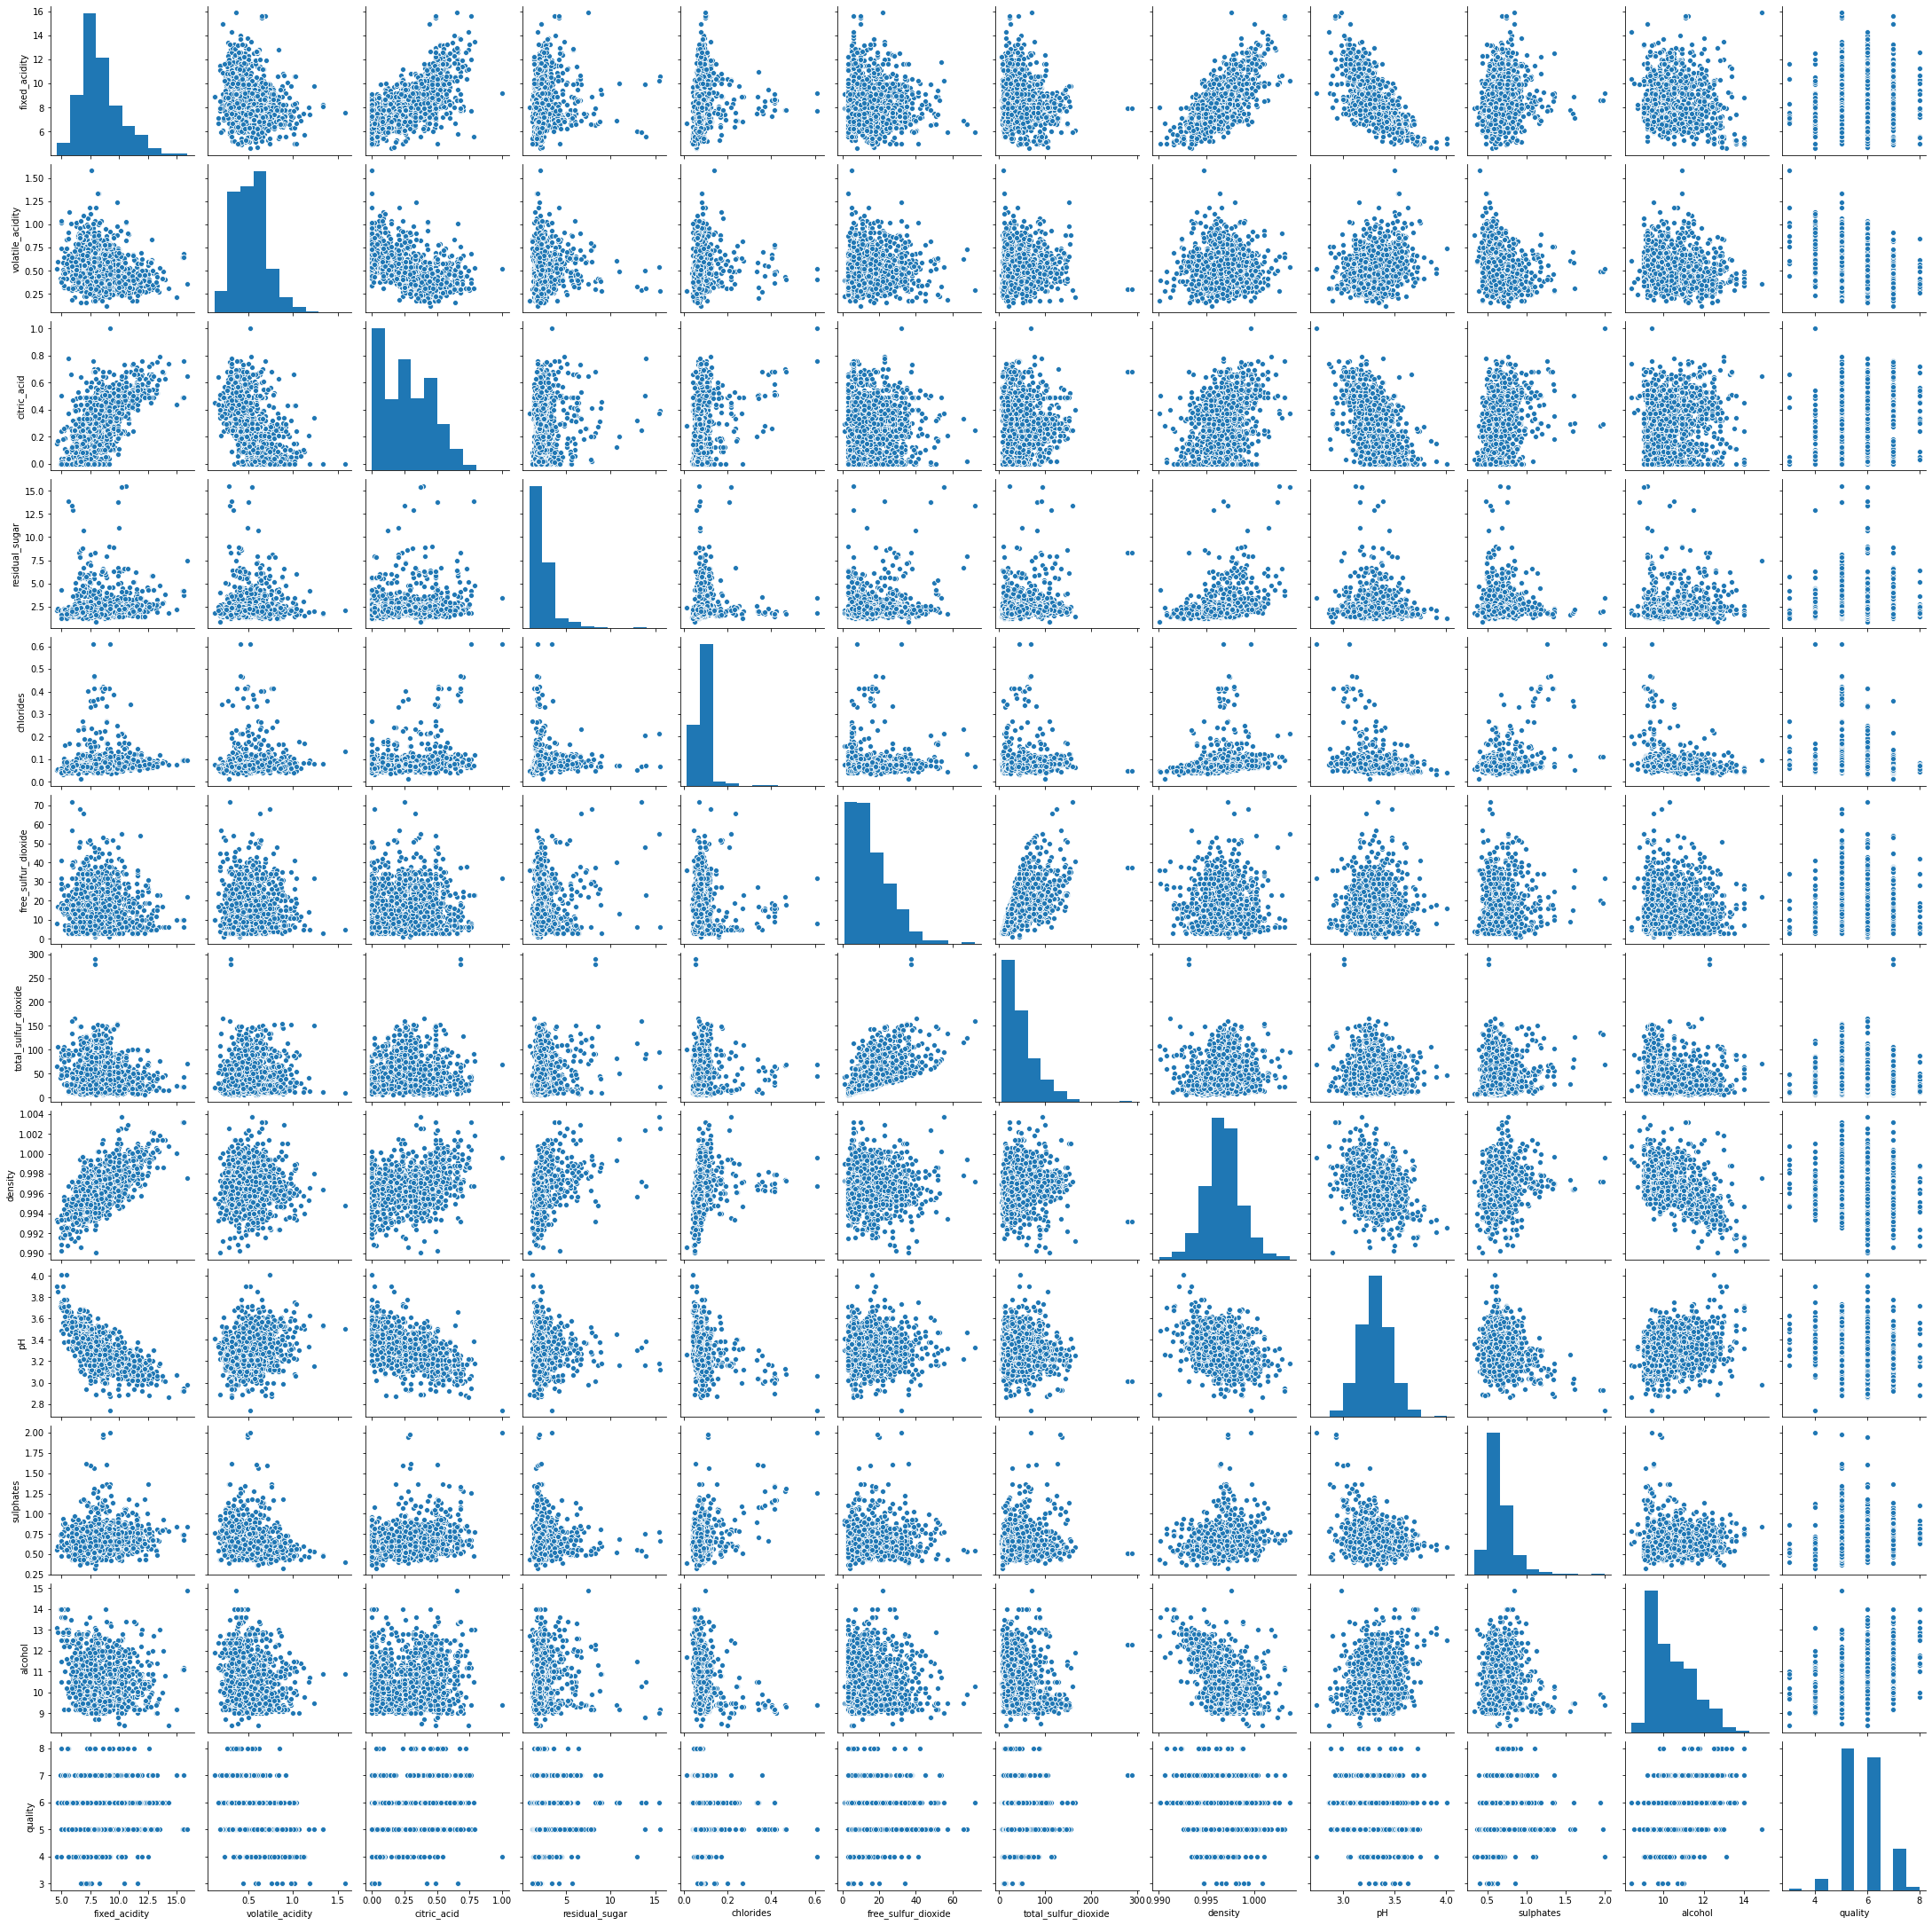

In [0]:
# red wine
sns.pairplot(red_wine_data)

The correlation between **fixed_acidity** and **citric_acid** is 0.67 (you could find this value in the correlation matrix of red wines). Looking for scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

Similarly we can plot scatter plot between variables for white wines.

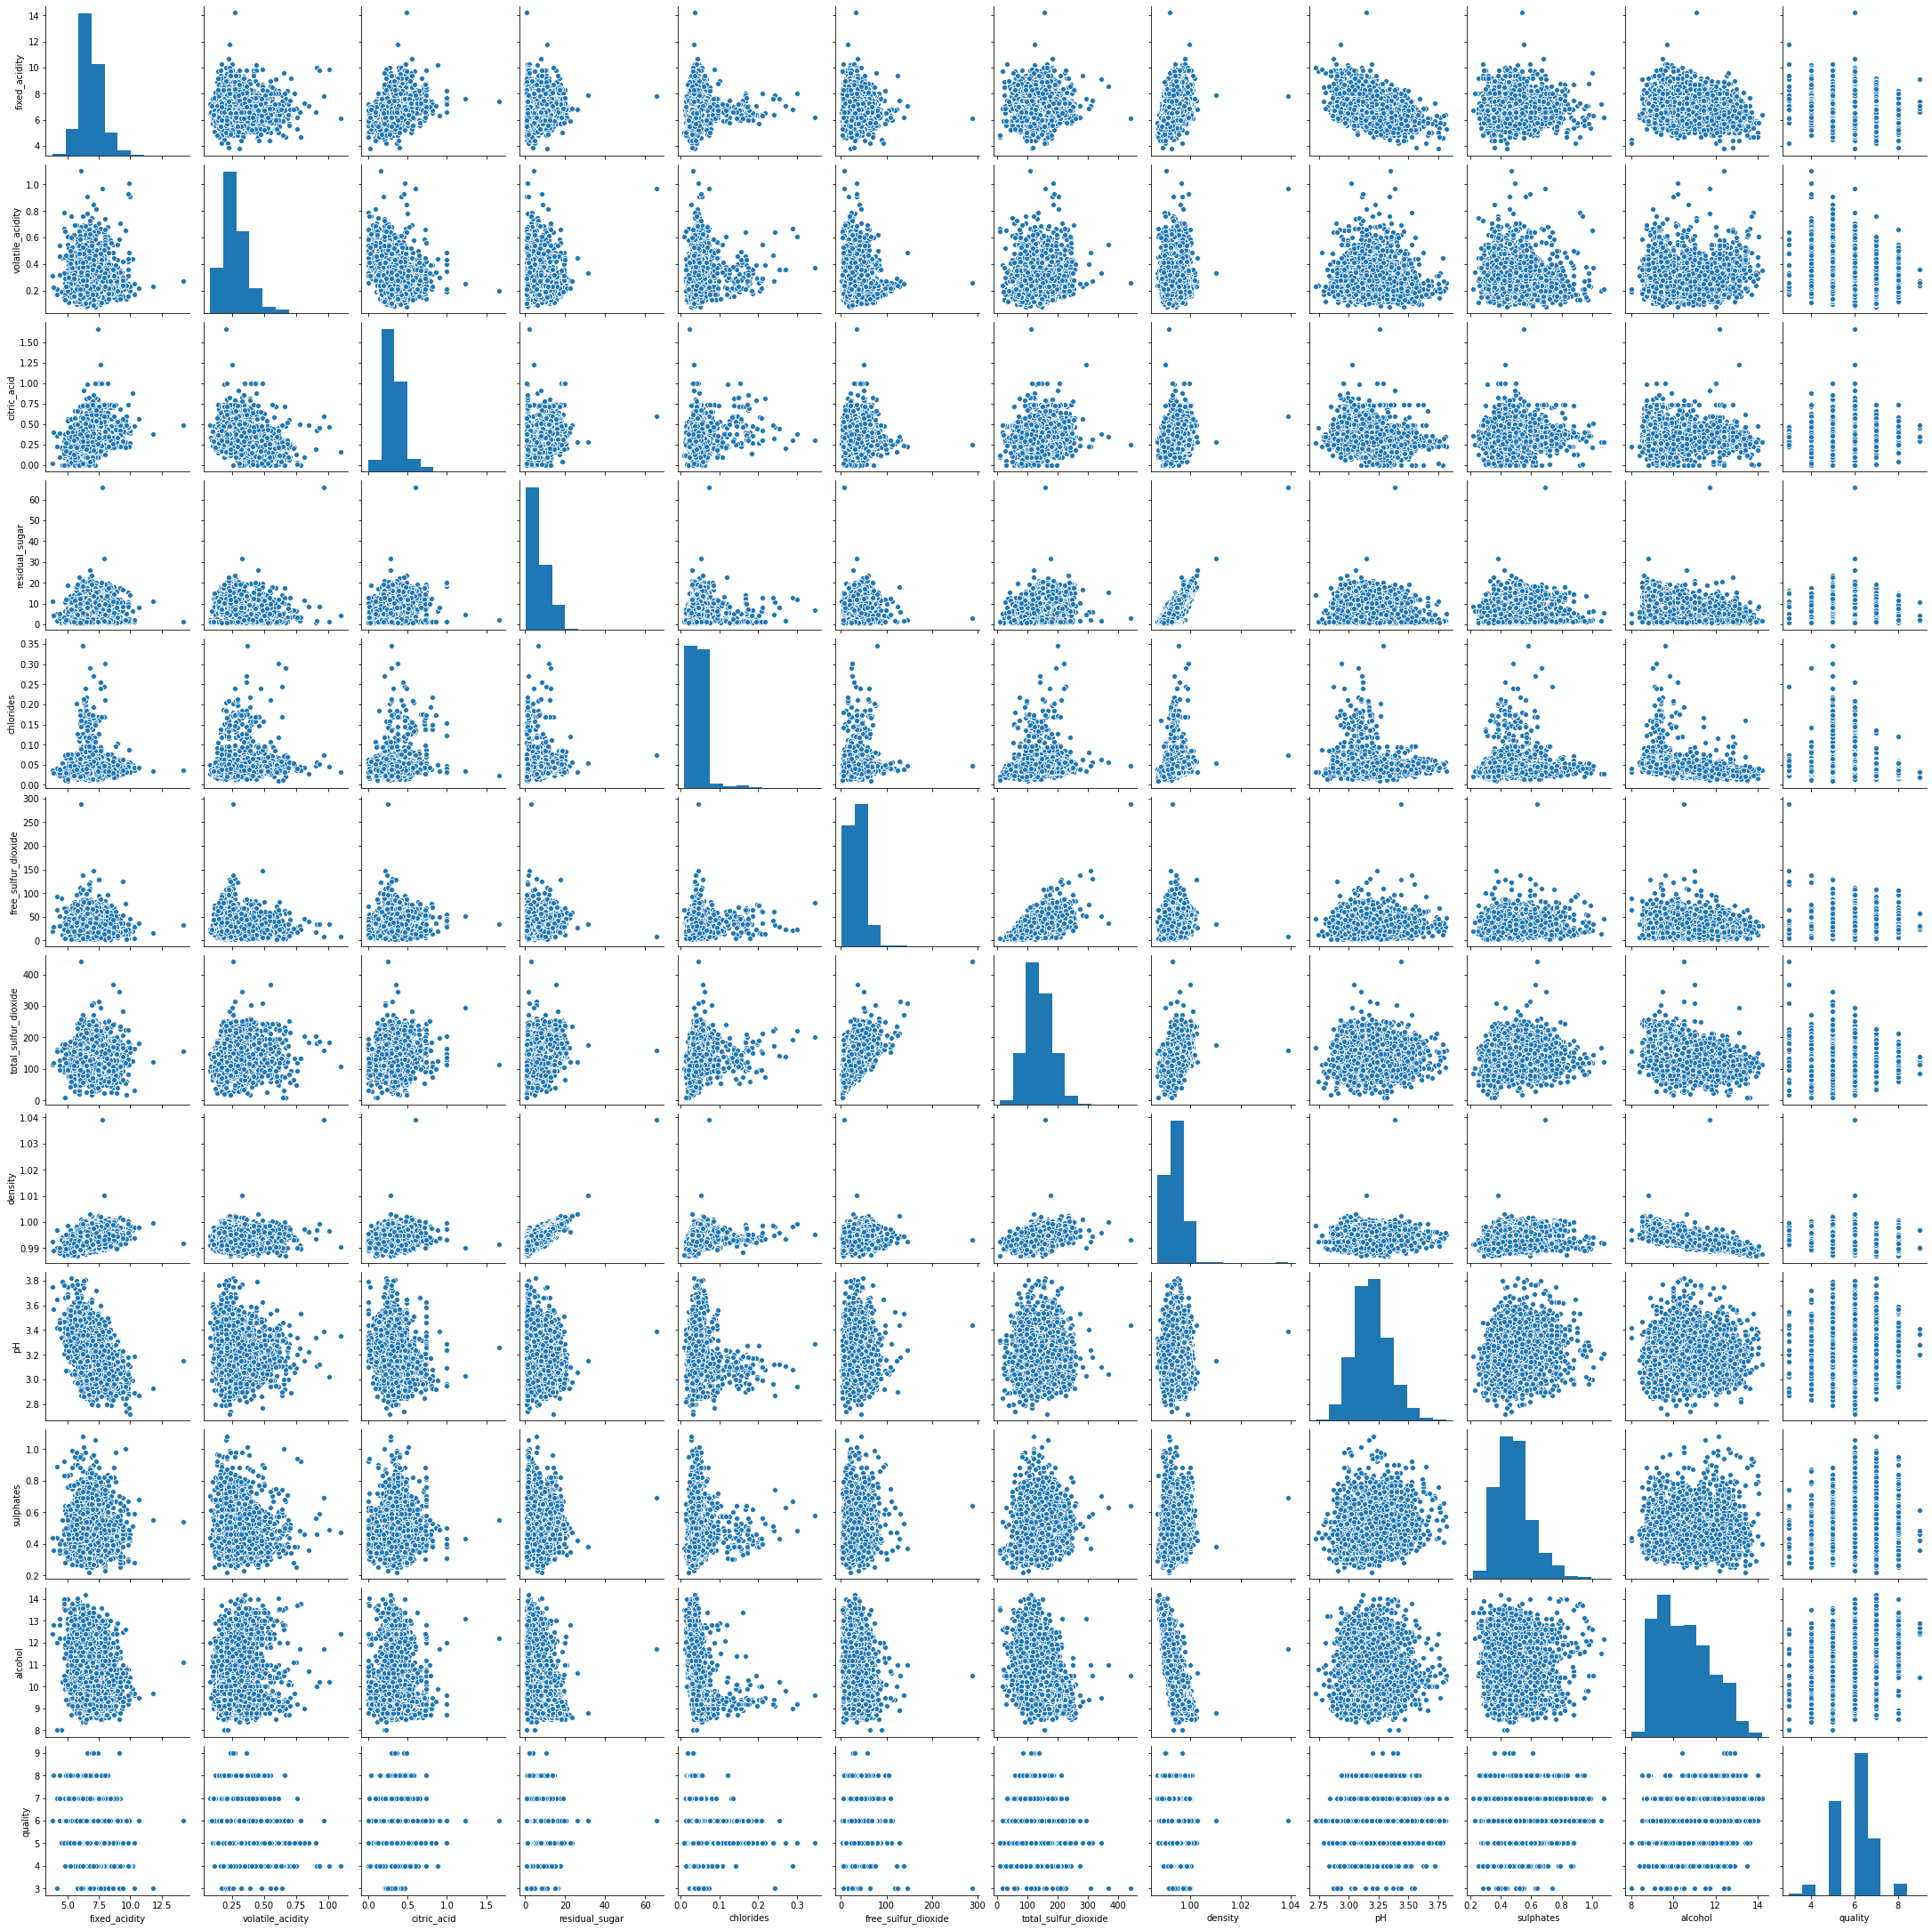

In [0]:
# Pairplot
sns.pairplot(white_wine_data)

#### **References:**
1. [Step-by-step guide for predicting Wine Preferences using Scikit-Learn by Nataliia Rastoropova](https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a)
2. [A tutorial for COMPLETE BEGINNERS](https://www.kaggle.com/drgilermo/a-tutorial-for-complete-beginners)
3. [Introduction to Descriptive Statistics and Exploratory Data Analysis by Joinal Ahmed](https://www.youtube.com/watch?v=5CoETeAdi9A)

## **Note:**

We have removed the modeling part in this notebook as we will be discussing it in next set of sessions. Stay tuned and thank you!